In [135]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# samplerate, data = wavfile.read('file1.wav')
# times = np.arange(len(data))/float(samplerate)

# print(samplerate, len(times), len(times)/samplerate, len(data))
# print(type(times), type(data))
# print(times.shape)
# print(data.shape)

In [140]:
xf = np.linspace(0.0, 44100 / 2, N//2) # 1.0/(2.0*T) = RATE / 2
print(xf, xf.shape)
print(44100/2)

[0.00000000e+00 1.00154888e-01 2.00309776e-01 ... 2.20497997e+04
 2.20498998e+04 2.20500000e+04] (220160,)
22050.0


In [142]:
import pyaudio
import numpy as np

# constants for audio recording
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 10

audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True, frames_per_buffer=CHUNK, input_device_index=9)
#stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

frames = []
audioop_frames = b''

# Recording audio from the input device
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(np.frombuffer(data, dtype=np.int16))
    audioop_frames += data

# Change data format from audio to np.array
numpydata = np.hstack(frames)
times = np.arange(len(numpydata))/float(RATE)

N = numpydata.shape[0] # the total number of samples: 10 sec * 44100 sampling rate
T = 1.0 / RATE # a unit time for each sample: 44100 samples per a second

yf = np.fft.fftn(numpydata) # the n-dimensional FFT
xf = np.linspace(0.0, 1.0/(2.0*T), N//2) # 1.0/(2.0*T) = RATE / 2

octave = {}
avg = []
medium = [31, 64, 125, 250, 500, 1000, 2000, 4000, 8000, 16000] # Medium? of octave, hearable frequency

for i in range(10):
    octave[i] = [medium[i]]

val = yf[0:N//2]

for idx in range(len(xf)):
    if xf[idx] > 20 and xf[idx] < 44:
        octave[0].append(val[idx])
    elif xf[idx] > 43 and xf[idx] < 88:
        octave[1].append(val[idx])
    elif xf[idx] > 87 and xf[idx] < 176:
        octave[2].append(val[idx])
    elif xf[idx] > 175 and xf[idx] < 353:
        octave[3].append(val[idx])
    elif xf[idx] > 352 and xf[idx] < 707:
        octave[4].append(val[idx])
    elif xf[idx] > 706 and xf[idx] < 1414:
        octave[5].append(val[idx])
    elif xf[idx] > 1413 and xf[idx] < 2825:
        octave[6].append(val[idx])
    elif xf[idx] > 2824 and xf[idx] < 5650:
        octave[7].append(val[idx])
    elif xf[idx] > 5649 and xf[idx] < 11300:
        octave[8].append(val[idx])
    elif xf[idx] > 11299:
        octave[9].append(val[idx])

for di in range(len(octave)):
    avg.append(sum(octave[di])/len(octave[di]))

avg = np.asarray(avg)
avgdb = 10*np.log10(np.abs(avg))

a = []
b = 0,
for ia in range(len(avg)):
    a.append(((10**(avgdb[ia]/10))**(1/2)) * 0.00002)
    b = b + (a[ia]/0.00002)**2

sdb = 10*np.log10(b)

# sdb --> addtion of SPL, avgdb --> average of each octave

(220160,)
46.69009486552112
(220160,)
44.99964508808677
(220160,)
46.70198096330224
(220160,)
46.682419398665935
(220160,)
45.9446186320714
(220160,)
45.991491732253166
(220160,)
45.175094555594484
(220160,)
46.0810129102787
(220160,)
45.570475008905554
(220160,)
48.41183933995822


In [117]:
import pyaudio
import wave
import math

import audioop
import numpy as np

from matplotlib import pyplot as plt

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 10

In [118]:
audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True, frames_per_buffer=CHUNK, input_device_index=9)
#stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

print ("recording...")
frames = []
audioop_frames = b''

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(np.frombuffer(data, dtype=np.int16))
    audioop_frames += data
print ("finished recording")

recording...
finished recording


(440320,)
9.984580498866213
<class 'numpy.ndarray'> <class 'bytes'>
(440320,)
(440320,)
661500


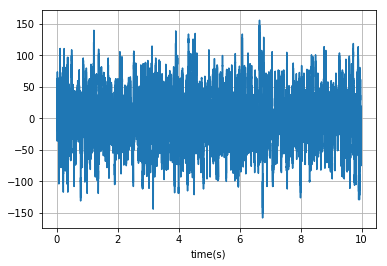

In [119]:
samplerate = RATE
numpydata = np.hstack(frames)
print(numpydata.shape)
print(len(numpydata)/44100)
times = np.arange(len(numpydata))/float(samplerate)
print(type(times), type(data))
print(times.shape)
print(numpydata.shape)
print(44100*15)

plt.plot(times, numpydata)
plt.xlabel('time(s)')
plt.grid()
plt.show()

In [9]:
print(44100*15*4)

2646000


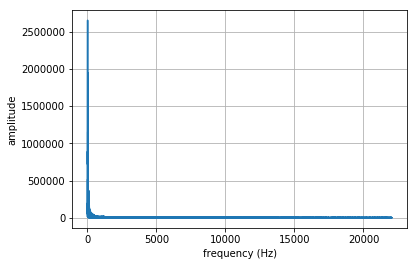

In [127]:
# from scipy.fftpack import fft
## 
N = numpydata.shape[0]
T = 1.0 / samplerate

yf = np.fft.fftn(numpydata)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.show()

In [128]:
print(N)
print(yf[0:N//2])
print(xf.shape)
print(xf)

440320
[-192087.           +0.        j   24862.43872454+6630.96221478j
   19159.16320149+5445.90883477j ...     535.9108755 -2773.69569409j
    1667.37581985-3139.02511731j    1158.60847267 -251.36528288j]
(220160,)
[0.00000000e+00 1.00154888e-01 2.00309776e-01 ... 2.20497997e+04
 2.20498998e+04 2.20500000e+04]


In [129]:
octave = {}
avg = []
medium = [31, 64, 125, 250, 500, 1000, 2000, 4000, 8000, 16000]

for i in range(10):
    octave[i] = [medium[i]]

val = yf[0:N//2]
    
print(octave)

for idx in range(len(xf)):
    if xf[idx] > 20 and xf[idx] < 44:
        octave[0].append(val[idx])
    elif xf[idx] > 43 and xf[idx] < 88:
        octave[1].append(val[idx])
    elif xf[idx] > 87 and xf[idx] < 176:
        octave[2].append(val[idx])
    elif xf[idx] > 175 and xf[idx] < 353:
        octave[3].append(val[idx])
    elif xf[idx] > 352 and xf[idx] < 707:
        octave[4].append(val[idx])
    elif xf[idx] > 706 and xf[idx] < 1414:
        octave[5].append(val[idx])
    elif xf[idx] > 1413 and xf[idx] < 2825:
        octave[6].append(val[idx])
    elif xf[idx] > 2824 and xf[idx] < 5650:
        octave[7].append(val[idx])
    elif xf[idx] > 5649 and xf[idx] < 11300:
        octave[8].append(val[idx])
    elif xf[idx] > 11299:
        octave[9].append(val[idx])


print(len(octave))
print(len(octave[0]))

for di in range(len(octave)):
    avg.append(sum(octave[di])/len(octave[di]))

avg = np.asarray(avg)

print(avg)
print(np.abs(avg))

{0: [31], 1: [64], 2: [125], 3: [250], 4: [500], 5: [1000], 6: [2000], 7: [4000], 8: [8000], 9: [16000]}
10
241
[-4.84516742e+03-3.26318518e+04j  2.93113672e+03-8.58358937e+03j
  1.47054902e+03-1.22909748e+03j -7.11363414e+01-2.33982349e+02j
 -7.04963078e+01-5.14346183e+02j -9.08342075e+01-8.74461215e+01j
 -4.17365600e+00-8.67556953e+01j -3.64708335e+00-3.86623757e+01j
  9.65599338e+00-2.17310274e+01j  1.96057779e+01+1.27934663e-01j]
[3.29895953e+04 9.07025738e+03 1.91655812e+03 2.44556984e+02
 5.19154818e+02 1.26085992e+02 8.68560307e+01 3.88340123e+01
 2.37797343e+01 1.96061953e+01]


[45.18376988 39.57619611 32.82521994 23.8838007  27.15296889 21.0066684
 19.38799979 15.89212264 13.76206997 12.92393324]
46.53552911419672
[45.18376988 39.57619611 32.82521994 23.8838007  27.15296889 21.0066684
 19.38799979 15.89212264 13.76206997 12.92393324]


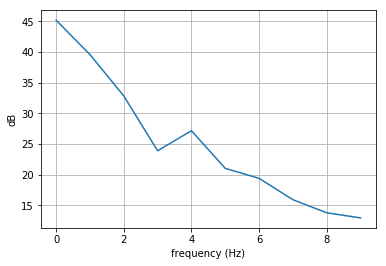

In [130]:
avgdb = 10*np.log10(np.abs(avg))

print(avgdb)

a = []
b = 0
for ia in range(len(avg)):
    a.append(((10**(avgdb[ia]/10))**(1/2)) * 0.00002)
    b = b + (a[ia]/0.00002)**2

c = 10*np.log10(b)
    
print(c)
print(avgdb)

# plt.figure(figsize=(18,12))
plt.plot(avgdb)
# plt.plot(xf, yfdb)
plt.xlabel('frequency (Hz)')
plt.ylabel('dB')
plt.grid()
plt.show()

[-223838.            +0.        j     378.67274625 -4277.06622966j
    1807.83136428 -2204.52637381j ...   19384.97732399+21511.09637109j
    1807.83136428 +2204.52637381j     378.67274625 +4277.06622966j]
[106.99867633  72.6568292   69.09993888 ...  63.21200409  66.77574597
  66.18992373]


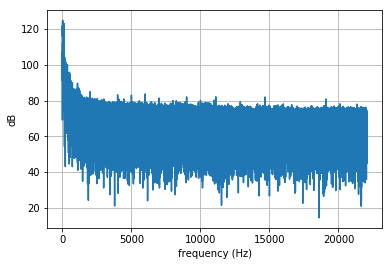

In [12]:
print(yf)
yfdb = 20*np.log10(np.abs(yf[0:N//2]))
print(yfdb)

# plt.figure(figsize=(18,12))
plt.plot(xf, yfdb)
plt.xlabel('frequency (Hz)')
plt.ylabel('dB')
plt.grid()
plt.show()

In [13]:
print(yfdb.shape)

(220160,)


(2645504,)
(2645504,)


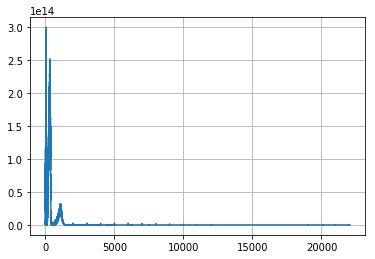

In [127]:
ps = np.abs(np.abs(yf[0:N//2]))**2

print(ps.shape)
print(xf.shape)

# plt.figure(figsize=(18,12))
plt.plot(xf, ps)
plt.grid()
plt.show()

[[-47 -47]
 [-45 -45]
 [-47 -47]
 ...
 [-12 -12]
 [-10 -10]
 [ -5  -5]]


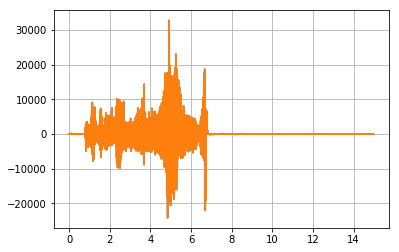

In [88]:
print(data)

plt.plot(times, data)
plt.grid()
plt.show()

In [114]:
times = times[0:int(len(times)/2)]
print(len(times))

abc = np.transpose(data)[0]
abc = abc[0:int(len(abc)/2)]

print(abc)
print(abc.shape)

330240
[-47 -45 -47 ... -47 -43 -46]
(330240,)


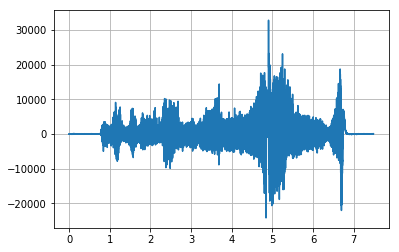

In [117]:
from scipy.fftpack import fft
N = 33024
T = 1.0 / samplerate

x = np.linspace(0.0, N*T, N)

plt.plot(times, abc)
plt.grid()
plt.show()

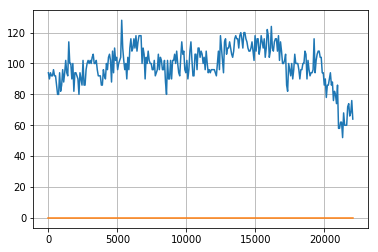

In [125]:
from scipy.fftpack import fft
N = 600
T = 1.0 / samplerate

x = np.linspace(0.0, N*T, N)
yf = fft(data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, np.abs(yf[0:N//2]))
plt.grid()
plt.show()

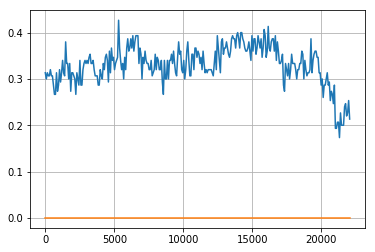

In [26]:
from scipy.fftpack import fft
N = 600
T = 1.0 / samplerate

x = np.linspace(0.0, N*T, N)
yf = fft(data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

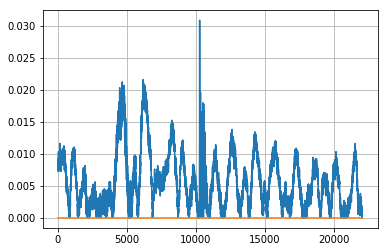

In [25]:
from scipy.fftpack import fft
N = 22050
T = 1.0 / samplerate

x = np.linspace(0.0, N*T, N)
yf = fft(data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

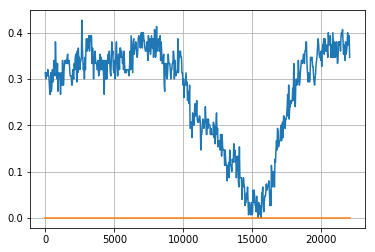

In [37]:
from scipy.fftpack import fft
N = 600
T = 1.0 / 44100

x = np.linspace(0.0, N*T, N)
yf = fft(data)
xf = np.linspace(0.0, 1.0/(2.0*T), N)

plt.plot(xf, 2.0/N * np.abs(yf[0:N]))
plt.grid()
plt.show()

(600,)


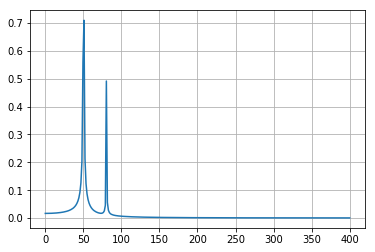

In [58]:
N = 600
T = 1.0 / 800

x = np.linspace(0.0, N*T, N)
y = np.sin(50.0*2.0*np.pi*x) + 0.5*np.sin(80.0*2.0*np.pi*x)
print(y.shape)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

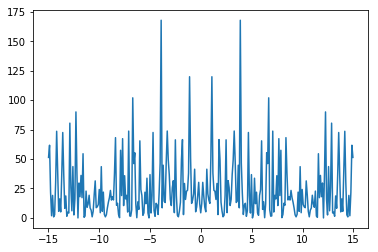

In [45]:
from __future__ import division

data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

time_step = 1/30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])